# Calculate distance tutorial

Tutorial presents use cases of euclidean distance function. It is designed to explain theory, algorithm and data structures related to this method.

Scope of the notebook:
* One dimensional array / <span style="color:pink">Practice</span>
* Two dimensional matrix / <span style="color:pink">Practice</span>
* Three dimensional matrices / <span style="color:pink">Practice</span>
* Points in n-dimensional space / <span style="color:pink">Practice</span>
* Data limits / <span style="color:pink">Practice</span>
* Mathematical assumptions / <span style="color:green">Theory</span>
* Algorithm and numpy functions behind it / <span style="color:green">Theory</span>

In [1]:
# Import libraries for the data preparation (numpy) and visualizations (matplotlib). Import reviewed function.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyinterpolate.kriging.helper_functions.euclidean_distance import calculate_distance

## One dimensional array: distances between all points

One dimensional arrays are usually signals coming from different sources and their position usually represents time, e.g.: temperature readings day by day, voltage measurements in circuit, traffic in the website or number of customers in the shop by hour by year. In some cases a dimension represents spatial units: the force streatching steel line in each point. To make this tutorial more readable we will use "real world" signals.

### Signal description

Signal used in this tutorial comes from the standard: Cardiac monitors, heart rate meters, and alarms [American National Standard (ANSI/AAMI EC13:2002)]. Arlington, VA: Association for the Advancement of Medical Instrumentation, 2002. Data is retrieved from PhysioNet database: Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220 [Circulation Electronic Pages; http://circ.ahajournals.org/content/101/23/e215.full]; 2000 (June 13).

Data represents ECG signal and it is sampled at rate of 720 samples per second (720Hz).

In [4]:
# Signal

signal = np.fromfile('../data/aami3a.dat', dtype=float)[:720]
time_array = np.arange(start=0, stop=1, step=1/len(signal))

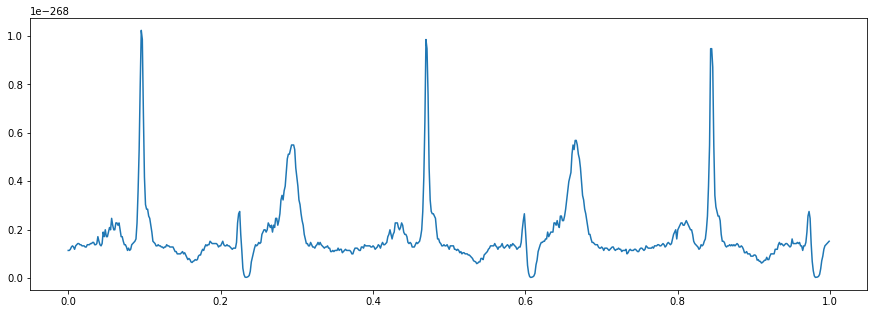

In [5]:
plt.figure(figsize=(15,5))
plt.plot(time_array, signal)

In [6]:
# Calculate distance: column with "distances" should be passed into this function

d = calculate_distance(time_array)

Distance represents one dimensional array. It is easy to test if our function works well - the first row of output matrix should be the same as our points array minus the first value of points array. Why? Because each row of output array represents distances from each point to the other points where each column represents position of specific point. 

In [7]:
time_array[:10]  ## input distance

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [8]:
d[0][:10]  ## output distances

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [9]:
(time_array - time_array[0])[:10]  ## input distance minus the first measurement

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

## Two dimensional array: distances between points located on the Earth's surface

If you want to measure acidity (pH) of soil in a corn field you take few dozens of samples from different locations inside your study area and interpolate missing measurements from them. Each point has specific address: latitude and longitude or x and y on the cartesian plane. If you want to perform interpolation of a soil acidity in positions where you didn't take samples then you should know distances between your points. You may even assume that the value in unknown location is the sum other values divided by distance to them.

It works like the Coulomb's law known from physics but example of this rule will be presented in different tutorial. I'll show here how does function work with the two-dimensional data.

In [10]:
# Point locations

number_of_points = 5
loc_x = np.random.randint(0, high=20, size=(number_of_points,))
loc_y = np.random.randint(0, high=20, size=(number_of_points,))
vals = np.random.random_sample(size=(number_of_points,))

field_measurements = np.array([loc_x, loc_y, vals])
field_measurements = field_measurements.T

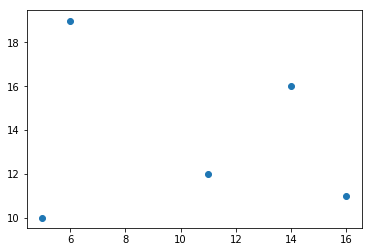

In [11]:
plt.scatter(field_measurements[:, 0], field_measurements[:, 1])

In [12]:
d = calculate_distance(field_measurements[:, :-1])

In [13]:
d

array([[  0.        ,   8.54400375,   8.60232527,  12.80624847,
          9.05538514],
       [  8.54400375,   0.        ,   5.        ,   5.38516481,
         10.81665383],
       [  8.60232527,   5.        ,   0.        ,   5.09901951,
          6.32455532],
       [ 12.80624847,   5.38516481,   5.09901951,   0.        ,
         11.04536102],
       [  9.05538514,  10.81665383,   6.32455532,  11.04536102,   0.        ]])

## Three dimensional matrix: points cloud

Moving from 2D into 3D from mathematical point of view is simple: we just adding a new column to our array which indicates "z" dimension. It could be depth or elevation or time in a real world application. If sampling of two-dimensional area may be expensive then the new dimension multiplies this cost. Sometimes by very large factor if you must perform drills to obtain geological samples from different depths over big area.

In [14]:
# Preparation of data

number_of_points = 25
depth = np.random.randint(-80, 0, size=(number_of_points,))
loc_x = np.random.randint(-10, 10, size=(number_of_points,))
loc_y = np.random.randint(-10, 10, size=(number_of_points,))
vals = np.random.random_sample(size=(number_of_points,))

matrix3D = np.array([loc_x, loc_y, depth, vals])
matrix3D = matrix3D.T

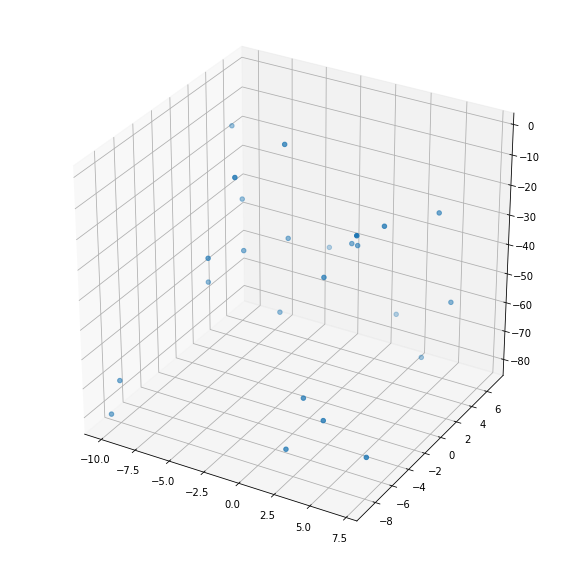

In [15]:
# Figure

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=matrix3D[:, 0], ys=matrix3D[:, 1], zs=matrix3D[:, 2])

In [16]:
# Distance

d = calculate_distance(matrix3D[:, :-1])
d[0]

array([  0.        ,  18.60107524,  37.32291521,   7.87400787,
        50.48762225,  25.78759392,  51.00980298,  19.26136028,
        16.09347694,  12.84523258,  24.55605832,  42.73172124,
        45.22167622,  57.76677246,  40.63249931,  52.71622141,
        14.89966443,  16.30950643,  13.15294644,  18.86796226,
        29.01723626,  29.47880595,  10.29563014,  49.18333051,  29.68164416])

## The last practical example: n-dimensional data set. 

Sometimes data has more than 3 dimensions and you still need some metrics to calculate a distance between each point of data. Usually the dimensionality should be reduced but even with smaller number of the data dimensions their count may exceed 3.

If you have a machine learning system for average rate prediction you should include many features such as: size of flat (1st Dim.), number of rooms (2nd Dim.), distance to the shops (3rd Dim.), distance to the nearest museum (4th Dim.) ... etc.

I will create here big numpy array with 100 features and only 5 samples to calculate distance between them.

In [17]:
number_of_points = 100
feature_matrix = np.random.random_sample(size=(5, number_of_points))

In [18]:
d = calculate_distance(feature_matrix)

In [19]:
d[0]

array([ 0.        ,  3.76197774,  4.17661034,  4.04092936,  3.72348248])

In [20]:
d

array([[ 0.        ,  3.76197774,  4.17661034,  4.04092936,  3.72348248],
       [ 3.76197774,  0.        ,  3.91475362,  4.26136858,  3.64183615],
       [ 4.17661034,  3.91475362,  0.        ,  4.15150762,  4.17753962],
       [ 4.04092936,  4.26136858,  4.15150762,  0.        ,  3.69899775],
       [ 3.72348248,  3.64183615,  4.17753962,  3.69899775,  0.        ]])

## Data Limits

Actually algorithm has a hardcoded data size limits due to the memory management. It can take only 5000 samples. If it is a serious issue then in the future I will enhance method to work on the bigger datasets.

In [21]:
number_of_samples = 5001
dimensions = 3
data_above_a_limit = np.random.randint(low=0, high=100, size=(number_of_samples, dimensions))

In [22]:
d = calculate_distance(data_above_a_limit)

ValueError: Please provide array with less than 5000 elements

In [23]:
number_of_samples = 5000
dimensions = 9
data_above_a_limit = np.random.randint(low=0, high=100, size=(number_of_samples, dimensions))

In [24]:
d = calculate_distance(data_above_a_limit)

In [25]:
d[0]

array([   0.        ,  161.92590898,  106.50821565, ...,  149.44229656,
        156.13455735,  117.02991071])

## Mathematical backgorund

### Calculate distance between all coordinates

\begin{align}
d(\vec{\mathbf{p}}, \vec{\mathbf{q}}) & = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_i - p_i)^2 + ... + (q_n - p_n)^2}
\end{align}

where:
* $d(\vec{\mathbf{p}}, \vec{\mathbf{q}})$- distance between coordinates p and q

In the simplest form with one dimension equation takes form:

\begin{align}
d(\mathbf{p}, \mathbf{q}) & = \sqrt{(q - p)^2} = |q - p|
\end{align}

## Algorithm

Function <b>calculate_distance</b> takes one argument <i>points_array</i>: numpy array with points' coordinates where each column indices new dimension and each row is a new coordinate set (point) or sample. Example:

            column 1 | column 2 | column 3
            ________   ________   ________
    row 1 | point x1 | point y1 | point z1
    row 2 | point x2 | point y2 | point z2
    row 3 | point x3 | point y3 | point z3

### Variables initialization

At the beginning five variables are initialized:

<code>points_dictionary = {}
distances = []
maximum_length = 5000
number_of_rows = points_array.shape[0]
try:
    number_of_cols = points_array.shape[1]
except IndexError:
    number_of_cols = 1
</code>

Variable <code><b>points_dictionary</b></code> is a dictionary which holds pairs of key-value where key is a dimension number and values are numpy arrays with points coordinates in a given dimension. Based on our example above:

<code><i>points_dictionary</i> = <br>
    {<br>
     <b>1</b>: [point x1, point x2, point x3], <br>
     <b>2</b>: [point y1, point y2, point y3], <br>
     <b>3</b>: [point z1, point z2, point z3]<br>
    }</code>
    
Variable <code><b>distances</b></code> is an array of distances. It will represent calculated distances between points.<br>
The <code><b>maximum_length</b></code> is a hardcoded maximum number of samples (points) per array to protect memory of a program. In the future this solution will be changed. Along with <code><b>maximum_length</b></code> the <code><b>number_of_rows</b></code> is needed to check how many samples are in an array.<br>
<code><i>try ...  except ...</i></code> statement checks number of an array columns where each column indices point. If there are only one column then numpy array has only one dimension and it is impossible to set <code><b>number_of_cols</b></code> to the shape[1] because it doesn't exist. The <code>IndexError</code> occurs and <code><b>number_of_cols</b></code> is set to one.

### Check sample size and create arrays dictionary

In the next step sample size is compared to the maximum size defined to 5000 samples. If it is lower than new key and values are assigned to the <code><b>points_dictionary</b></code>. If array has only one dimension then it is passed as a value to the dictionary. If array has more dimensions then for each dimension new key is created.

<code>
    if number_of_cols == 1:
        if number_of_rows > maximum_length:
            raise ValueError('Please provide array with less than 5000 elements')
        else:
            points_dictionary[1] = points_array
    else:
        for i in range(number_of_cols):
            dimension = i + 1
            if number_of_rows > maximum_length:
                raise ValueError('Please provide array with less than 5000 elements')
            points_dictionary[dimension] = points_array[:, i]
</code>

### Calculate distances

Distance calculation for one dimensional array is simple: from each element of array subtract all array elements and get the absolute value of this operation:

> INPUT ARRAY: <b>array = [x1, x2, x3]</b><br>
> PROCESSED ARRAY: <b>[[x1 - x1, x1 - x2, x1 - x3], [x2 - x1, x2 - x2, x2 - x3], [x3 - x1, x3 - x2, x3 - x3]]</b><br>
> OUTPUT ARRAY: <b>abs(PROCESSED_ARRAY)</b>
    
Operation is similar for multidimensional array but it is performed in the loop. All differences of given dimension are squared, then summed in the array <code><b>dimensions</b></code>. After loop square root of <code><b>dimensions</b></code> values is calculated. The example:

> INPUT ARRAY: <b>[[x1, y1], [x2, y2]]</b><br>
> PROCESSED ARRAY X: <b>[[(x1 - x2)^2], [(x2 - x1)^2]]</b><br>
> PROCESSED ARRAY Y: <b>[[(y1 - y2)^2], [(y2 - y1)^2]]</b><br>
> PROCESSED ARRAY: <b>PROCESSED ARRAY X + PROCESSED ARRAY Y</b><br>
> OUTPUT ARRAY: <b>sqrt(PROCESSED_ARRAY)</b>

and the code:
<code>
    if len(points_dictionary) == 1:
        distances = np.subtract.outer(points_dictionary[1], points_dictionary[1])
        distances = np.abs(distances)
    elif len(points_dictionary) > 1:
        for key in points_dictionary:
            dist = np.subtract.outer(points_dictionary[key], points_dictionary[key])
            dist = dist ** 2
            if key == 1:
                distances = dist
            else:
                distances += dist
        distances = np.sqrt(distances)
    else:
        raise ValueError('Something is wrong. Did you pass an empty array?')
</code>

### Output

Function returns numpy array with euclidean distances between all pairs of points. If input array size has x rows (coordinates) then output array size is x(cols) by x(rows) and each row describes distances between coordinate from row(i) with all rows. The first column in row is a distance between coordinate(i) and coordinate(0), the second row is a distance between coordinate(i) and coordinate(1) and so on.

The example of input and output arrays:

> INPUT

            column 1 | column 2 | column 3
            ________   ________   ________
    row 1 | point x1 | point y1 | point z1
    row 2 | point x2 | point y2 | point z2
    row 3 | point x3 | point y3 | point z3
    
> OUTPUT

            column 1 | column 2 | column 3
            ________   ________   ________
    row 1 |    0     |   r1r2   |   r1r3
    row 2 |   r2r1   |    0     |   r2r3
    row 3 |   r3r1   |   r3r2   |    0
    
where:

* r1r2 = r2r1 - distance between coordinates from INPUT row 1 and INPUT row 2
* r1r3 = r3r1 - distance between coordinates from INPUT row 1 and INPUT row 3
* r2r3 = r3r2 - distance between coordinates from INPUT row 2 and INPUT row 3
* 0's - distance between the same points (no distance at all)